In [309]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

In [280]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [281]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [282]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [283]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [284]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [285]:
df.groupby('Outcome').describe()

Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        109.980000  ...                  0.56175  2.329  500.0  31.190000   
1        141.257463  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.968254  21.0  28.0  36.0  44.0  70.0  

[2 rows x 64 columns]

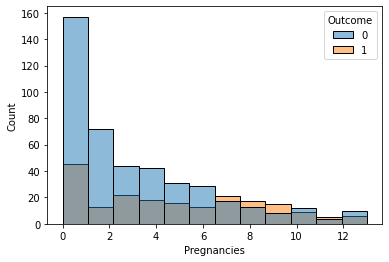

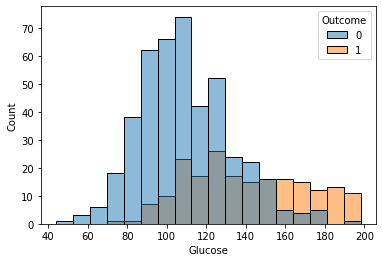

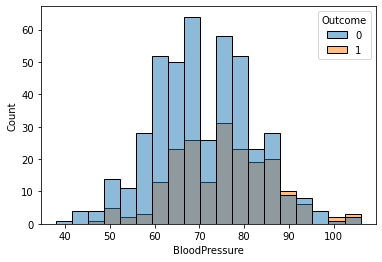

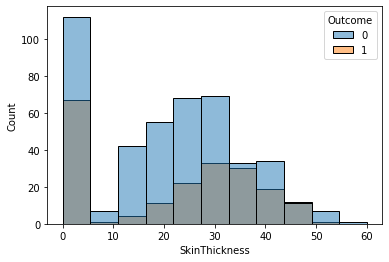

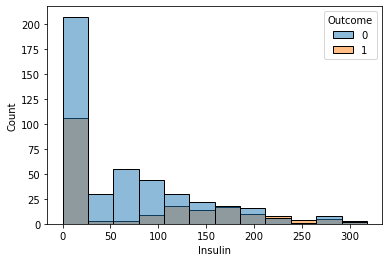

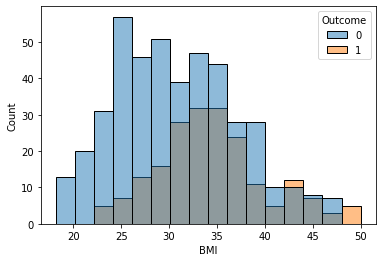

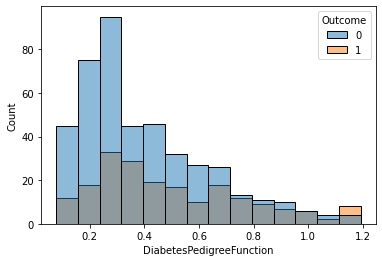

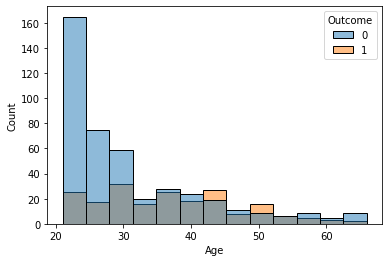

In [303]:
#Visualizing quantitative data (using historgrams)
quant_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
for i in quant_vars:
    sns.histplot(x = df[i], hue = df['Outcome'])
    plt.show()
#Note: 0 is non-diabetic, 1 is diabetic

#Pregnancies: skewed right, relatively same shape for both outcomes
#Glucose: center of diabetic distribution is greater than nondiabetic
#BloodPressure: relatively same shape
#BMI: center of diabetic distribution is slightly greater than nondiabetic
#Insulin: nondiabetic people had a higher median insulin compared to diabetic
#SkinThickness: relatively same shape
#DiabetesPedigreeFunction: diabetic people had slightly higher median compared to nondiabetic people
#Age: relatively same shape

In [287]:
df.groupby('Outcome')['Insulin'].median().reset_index()

,Outcome,Insulin
0,0,39.0
1,1,0.0


In [288]:
df.groupby('Outcome')['DiabetesPedigreeFunction'].median().reset_index()

,Outcome,DiabetesPedigreeFunction
0,0,0.336
1,1,0.449


In [289]:
#Make Outcome categorical for boxplots
df_cat = df.copy()
df_cat['Outcome'] = df_cat['Outcome'].apply(lambda x : "yes" if x == 1 else "no")
df_cat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,yes
1,1,85,66,29,0,26.6,0.351,31,no
2,8,183,64,0,0,23.3,0.672,32,yes
3,1,89,66,23,94,28.1,0.167,21,no
4,0,137,40,35,168,43.1,2.288,33,yes


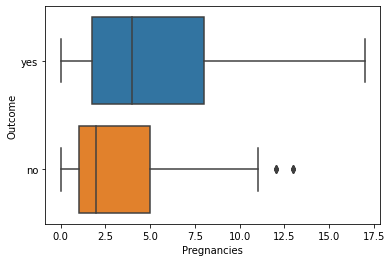

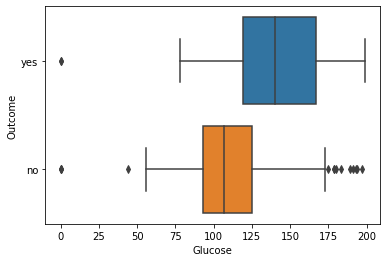

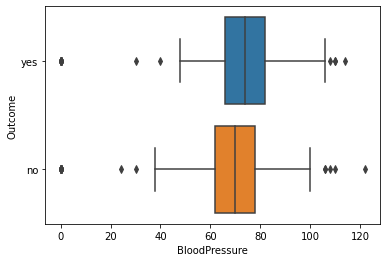

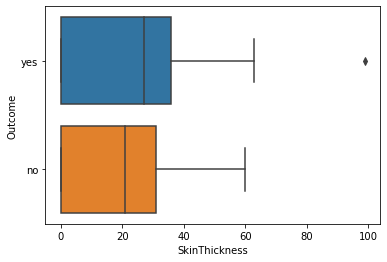

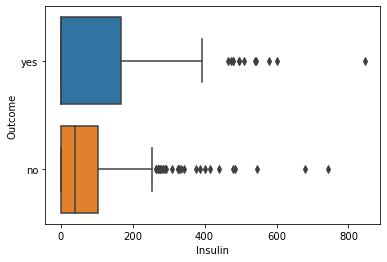

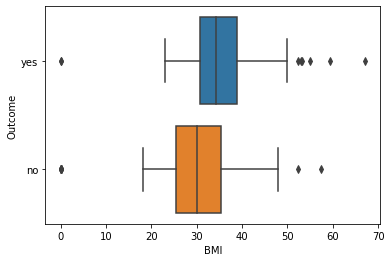

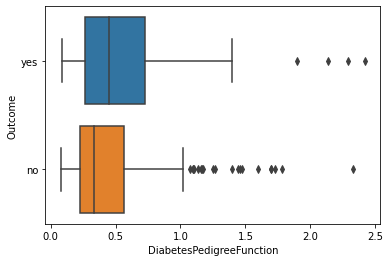

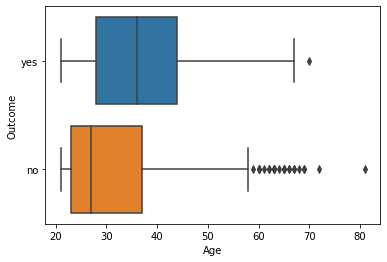

In [302]:
#Boxplots to look for outliers
for i in quant_vars:
    sns.boxplot(x = df_cat[i], y = df_cat['Outcome'])
    plt.show()

In [291]:
#pairplot
#sns.pairplot(df, hue = 'Outcome')

<AxesSubplot:>

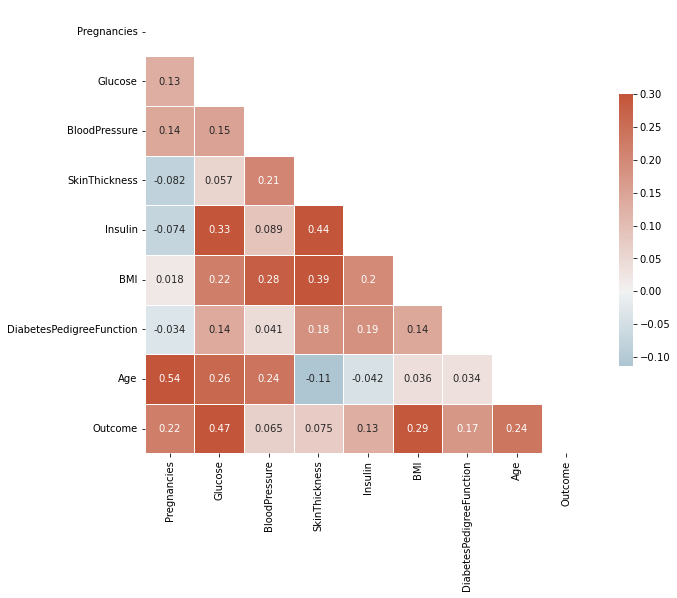

In [292]:
#Correlation matrix
fig, ax = plt.subplots(figsize = (10, 10))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [293]:
#Removing outliers from dataset
#Use IQR method because data is not normally distributed
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [295]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(639, 9)

In [297]:
#Scaling data
X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X, y)

In [298]:
#train test split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

In [299]:
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)


0.7582938388625592

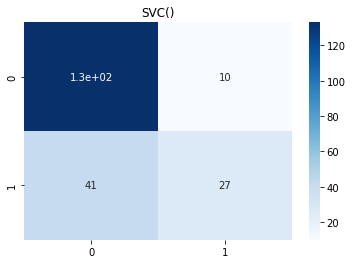

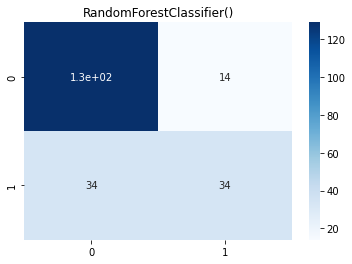

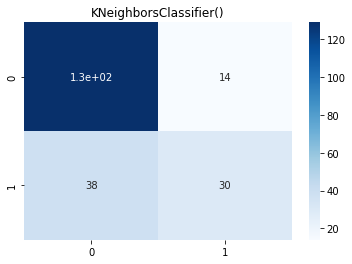

In [307]:
#Create function to test different models
models = [SVC(), RandomForestClassifier(), KNeighborsClassifier()]
scores = []
cross_val_scores = []
def test_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
    cross_val_scores.append((cross_val_score(model, X_scaled, y, cv=3)).mean())
    y_pred = model.predict(X_test)
    cf = confusion_matrix(y_test, y_pred)
    sns.heatmap(cf, annot = True, cmap = 'Blues')
    plt.title(i)
    plt.show()
for i in models:
    test_model(i, X_train, y_train, X_test, y_test)

In [308]:
def display_scores(scores, cross_val_scores):
    print("Scores:", scores)
    print("Cross-val scores:", cross_val_scores)
display_scores(scores, cross_val_scores)

Scores [0.7582938388625592, 0.7725118483412322, 0.7535545023696683]
Cross-val scores: [0.7871674491392802, 0.7746478873239436, 0.758998435054773]


In [311]:
#tune models
#SVC tuning
param_grid = {
    "C" :  [1, 10, 20],
    "kernel" : ["rbf", "linear"]
}
clf = GridSearchCV(SVC(gamma='auto'), param_grid, cv = 5, return_train_score=False)
clf.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [315]:
clf.best_estimator_

SVC(C=1, gamma='auto')

In [320]:
clf.best_score_

0.7824803149606299

In [326]:
#Random Forest tuning
param_grid = {
    "n_estimators" : [10, 20, 50, 100, 120, 150, 200]
}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5, return_train_score=False)
clf.fit(X_scaled, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 50, 100, 120, 150, 200]})

In [327]:
clf.best_estimator_

RandomForestClassifier(n_estimators=150)

In [328]:
clf.best_score_

0.7840182086614174

In [329]:
#feature importance
feature_importances = clf.best_estimator_.feature_importances_
feature_importances

array([0.08487085, 0.26732812, 0.08783702, 0.06684342, 0.0670991 ,
       0.15003421, 0.1264101 , 0.14957719])

In [333]:
feature_importance_list = list(zip(X.columns, feature_importances.tolist()))
feature_importance_list

[('Pregnancies', 0.08487084687525426),
 ('Glucose', 0.2673281173173965),
 ('BloodPressure', 0.08783702179302068),
 ('SkinThickness', 0.06684341566482302),
 ('Insulin', 0.06709910160521576),
 ('BMI', 0.15003421054868427),
 ('DiabetesPedigreeFunction', 0.12641009536471928),
 ('Age', 0.1495771908308864)]

<BarContainer object of 8 artists>

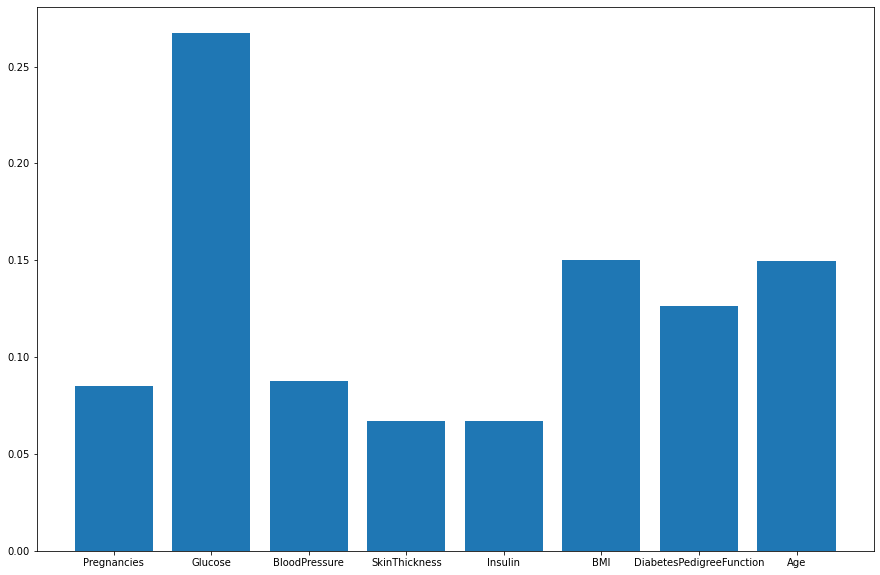

In [347]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.bar(x = X.columns, height = feature_importances.tolist())
#Glucose, BMI, DiabetesPedigreeFunction, and Age were the most important features